In [1]:
import pandas as pd
from upsetplot import UpSet
import matplotlib.pyplot as plt
from collections import defaultdict

In [10]:
p8=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\Overlapping top80 families.xlsx", sheet_name='UpSet plot CSM')
p8.head()

,Sample type,Gene names,Protein family
0,Blood,APOA1,Apolipoprotein A1/A4/E family
1,Blood,APOE,Apolipoprotein A1/A4/E family
2,Blood,C8G,"Calycin superfamily, Lipocalin family"
3,Blood,KRT1,Intermediate filament family
4,Blood,KRT2,Intermediate filament family


In [11]:
p8.columns = p8.columns.str.strip().str.lower().str.replace(" ", "_")


In [12]:
df_pivot_pf = p8.pivot_table(
    index='protein_family',
    columns='sample_type',
    aggfunc='size',
    fill_value=0
)

# Convert to boolean (1 = present, 0 = absent)
df_pivot_pf = df_pivot_pf.astype(bool)

print(df_pivot_pf)


sample_type                                         Blood  Brain/SC    CSF  \
protein_family                                                               
'GDSL' lipolytic enzyme family, Platelet-activa...  False     False  False   
14-3-3 family                                        True     False   True   
1A68                                                False     False   True   
A0A087WUD8                                          False     False   True   
A0A0B4J231                                          False     False   True   
...                                                   ...       ...    ...   
WDFY4                                               False     False   True   
WDR54                                               False      True  False   
YIPF3                                               False     False   True   
histone H2A family                                   True      True  False   
vWF                                                  True     Fa

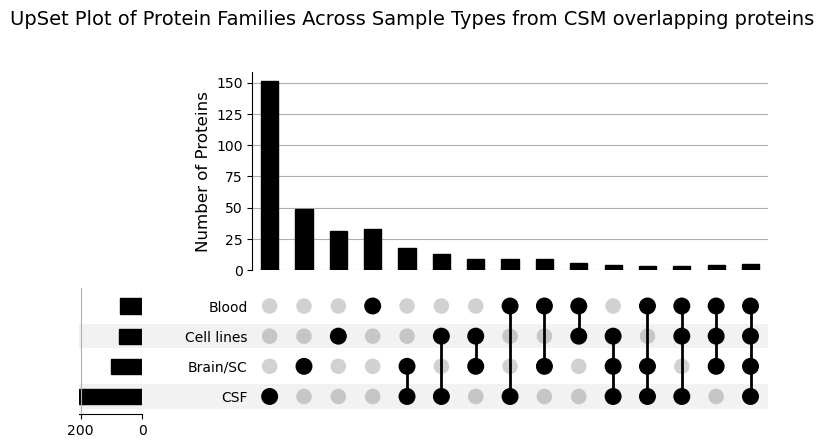

In [15]:

# Create UpSet plot data
upset_data = df_pivot_pf.groupby(list(df_pivot_pf.columns)).size()

# Create the UpSet plot
upset = UpSet(upset_data)
upset.plot()

# Add title and axis labels 
plt.suptitle("UpSet Plot of Protein Families Across Sample Types from CSM overlapping proteins", fontsize=14, y=1.02) 
plt.xlabel("Intersection Sets", fontsize=12) 
plt.ylabel("Number of Proteins", fontsize=12)

# Show the plot
plt.show()

In [22]:
t8=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\Overlapping top80 families.xlsx", sheet_name='UpSet plot SS')
t8.head()

,Sample type,Gene names,Protein family
0,Blood,APOE,Apolipoprotein A1/A4/E family
1,Blood,PLTP,"BPI/LBP/Plunc superfamily, BPI/LBP family"
2,Blood,ORM1,"Calycin superfamily, Lipocalin family"
3,Blood,APOD,"Calycin superfamily, Lipocalin family"
4,Blood,AMBP,"Calycin superfamily, Lipocalin family"


In [23]:
t8.columns = t8.columns.str.strip().str.lower().str.replace(" ", "_")


In [26]:
df_pivot_t8 = t8.pivot_table(
    index='protein_family',
    columns='sample_type',
    aggfunc='size',
    fill_value=0
)

# Convert to boolean (1 = present, 0 = absent)
df_pivot_t8 = df_pivot_t8.astype(bool)

print(df_pivot_t8)


sample_type                                 Blood  Brain/SC    CSF  Cell lines
protein_family                                                                
41                                           True     False  False       False
 CAH1                                       False     False   True       False
 HBA                                        False     False   True       False
 HBB                                        False     False   True       False
 KCRM                                       False     False   True       False
...                                           ...       ...    ...         ...
WDR54                                       False      True  False       False
X(+)/potassium ATPases subunit beta family  False      True  False        True
XEDAR                                        True     False  False       False
ZFR2                                        False     False   True       False
vWF                                          True   

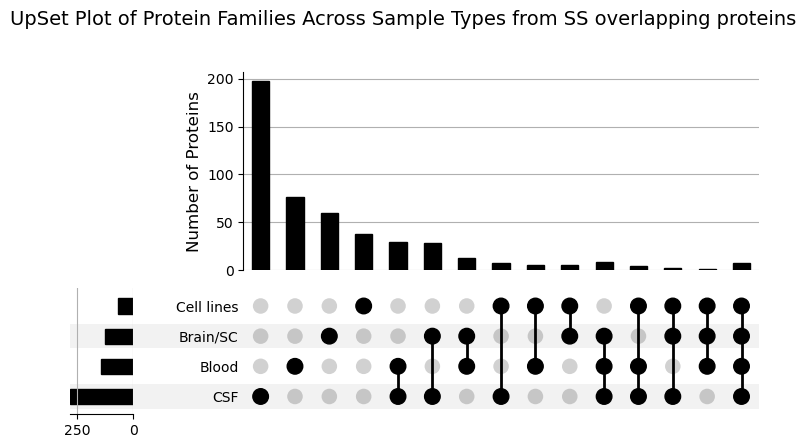

In [27]:

# Create UpSet plot data
upset_data = df_pivot_t8.groupby(list(df_pivot_t8.columns)).size()

# Create the UpSet plot
upset = UpSet(upset_data)
upset.plot()

# Add title and axis labels 
plt.suptitle("UpSet Plot of Protein Families Across Sample Types from SS overlapping proteins", fontsize=14, y=1.02) 
plt.xlabel("Intersection Sets", fontsize=12) 
plt.ylabel("Number of Proteins", fontsize=12)

# Show the plot
plt.show()